In [1]:
# This model will be a deep neural network
# Second model that I will explore will be a MLKNN( Multi Layer K-Nearest Neighbor)

In [22]:
# !pip install keras==2.5.0rc0
# !pip install tensorflow-addons
# !pip install --upgrade tensorflow==2.4.0
# !pip install mltb
# !pip install h5py

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
import statsmodels.api as sm
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
# import tensorflow_addons as tfa
from IPython.display import clear_output

In [2]:
data = pd.read_csv('mod_train.csv')
unk_data_2 = pd.read_csv('mod_test.csv')

In [3]:
unk_data = unk_data_2.drop(['Reading_ID'], axis=1)

In [4]:
ID_df = unk_data_2[['Reading_ID']]

In [5]:
# Split in to X and Y
X = data.drop(['Reading_ID','hdl_cholesterol_human', 'hemoglobin_human', 'cholesterol_ldl_human'], axis=1)
Y = data[['hdl_cholesterol_human', 'hemoglobin_human', 'cholesterol_ldl_human']]

In [6]:
# N_s -> Number of Samples
# N_i -> Number of input features

N_s, N_i = X.shape

In [7]:
Y_2 = pd.get_dummies(Y)

In [8]:
Y_2

,hdl_cholesterol_human_high,hdl_cholesterol_human_low,hdl_cholesterol_human_ok,hemoglobin_human_high,hemoglobin_human_low,hemoglobin_human_ok,cholesterol_ldl_human_high,cholesterol_ldl_human_low,cholesterol_ldl_human_ok
0,0,0,1,0,0,1,0,0,1
1,0,0,1,1,0,0,1,0,0
2,0,0,1,0,0,1,1,0,0
3,0,1,0,0,0,1,1,0,0
4,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
13135,1,0,0,0,0,1,0,0,1
13136,0,0,1,0,0,1,0,0,1
13137,0,0,1,0,0,1,0,0,1
13138,0,0,1,0,0,1,0,0,1


In [9]:
N_so, N_o = Y_2.shape

In [12]:
# blood_levels = {'low': ([0,0,1]),
                # 'ok': ([0,1,0]),
                # 'high': ([1,0,0])}
# Y['hdl_cholesterol_human_ord'] = Y.hdl_cholesterol_human.map(blood_levels)
# Y['hemoglobin_human_ord'] = Y.hemoglobin_human.map(blood_levels)
# Y['cholesterol_ldl_human_ord'] = Y.cholesterol_ldl_human.map(blood_levels)
# Y_mod = Y.drop(['hdl_cholesterol_human', 'hemoglobin_human', 'cholesterol_ldl_human'], axis=1)

In [13]:
# Y_mod['hdl_cholesterol_human_ord'] = Y_mod['hdl_cholesterol_human_ord'].apply(np.array)
# Y_mod['hemoglobin_human_ord'] = Y_mod['hemoglobin_human_ord'].apply(np.array)
# Y_mod['cholesterol_ldl_human_ord'] = Y_mod['cholesterol_ldl_human_ord'].apply(np.array)

In [14]:
# for idx, row in Y_mod.iterrows():
    # row.hdl_cholesterol_human_ord = np.array(row.hdl_cholesterol_human_ord)

In [15]:
# temp = np.array(Y_mod['hdl_cholesterol_human_ord'].iloc[0])

In [16]:
# Label encoder for Target variables
# le = LabelEncoder()
# Y_enc = Y.apply(le.fit_transform)

In [10]:
# Normalization of X

# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
#Normalization is good to use when you know that the distribution of your data does not follow a 
#Gaussian distribution. 
#This can be useful in algorithms that do not assume any distribution of the data like 
#K-Nearest Neighbors and Neural Networks.
#Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 
#However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a 
#bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

#https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
#If the distribution of the quantity is normal, then it should be standardized, otherwise the data should 
#be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)

# transform validation data
# X_val_norm = norm.transform(X_val)

# transform test data
# X_test_norm = norm.transform(X_test)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm,Y_2,test_size=0.2,random_state=27)
# X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=27)

In [12]:
X_train.shape

(10512, 182)

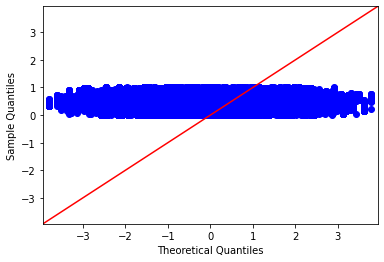

In [13]:
sm.qqplot(X_norm, line ='45')
pl.show()

In [14]:
# Calculating number of neurons in hidden layers
# one additional rule of thumb that helps for supervised learning problems. You can usually prevent over-fitting if you keep your number of neurons below:

# Nh=Ns/(α∗(Ni+No))

# Ni = number of input neurons.
# No = number of output neurons.
# Ns = number of samples in training data set.
# α  = an arbitrary scaling factor usually 2-10.

# Others recommend setting α to a value between 5 and 10, but I find a value of 2 will often work without overfitting. You can think of α as 
# the effective branching factor or number of nonzero weights for each neuron. Dropout layers will bring the "effective" branching factor way down 
# from the actual mean branching factor for your network.

# As explained by this excellent NN Design text, you want to limit the number of free parameters in your model (its degree or number of nonzero weights) to a 
# small portion of the degrees of freedom in your data. The degrees of freedom in your data is the number samples * degrees of freedom (dimensions) in each 
# sample or Ns∗(Ni+No)
# (assuming they're all independent). So α is a way to indicate how general you want your model to be, or how much you want to prevent overfitting.

# For an automated procedure you'd start with an α of 2 (twice as many degrees of freedom in your training data as your model) and work your way up to 10 
# if the error (loss) for your training dataset is significantly smaller than for your test dataset.


# There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
# 
# The number of hidden neurons should be between the size of the input layer and the size of the output layer.
# The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
# The number of hidden neurons should be less than twice the size of the input layer.

alpha = 2
N_h = math.ceil(N_s/(alpha * (N_i + N_o)))


In [15]:
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Dense(N_h, input_dim=N_i, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(N_h, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(N_o, kernel_initializer='he_uniform', activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [16]:
%%time
seed=7
np.random.seed(seed)
epochs = 100
model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, verbose=1)

batch_size = [1,10, 100, 500, 1000, X_train.shape[0]]
leraning_rate = [0.1, 0.01, 0.001, 0.0001]
param_grid = dict(batch_size=batch_size, learning_rate=leraning_rate)

grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_train, Y_train)

print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Train on 10512 samples
Epoch 1/100
10512/10512 [==============================] - 2s 182us/sample - loss: 0.4565 - accuracy: 0.7794
Epoch 2/100
10512/10512 [==============================] - 1s 130us/sample - loss: 0.4405 - accuracy: 0.7880
Epoch 3/100
10512/10512 [==============================] - 1s 133us/sample - loss: 0.4335 - accuracy: 0.7910
Epoch 4/100
10512/10512 [==============================] - 1s 133us/sample - loss: 0.4255 - accuracy: 0.7942
Epoch 5/100
10512/10512 [==============================] - 1s 131us/sample - loss: 0.4185 - accuracy: 0.7976
Epoch 6/100
10512/10512 [===

In [16]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot learning curves of the model during training
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []

    
    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15, 5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch +2), self.metrics[metric], label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), self.metrics['val_' + metric], label='val_' + metric)
            
            axs[i].legend()
            axs[i].grid()

        
        plt.tight_layout()
        plt.show()
        


In [17]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []
    
    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label='loss')
        plt.plot(self.x, self.val_losses, label='val_loss')
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

1052/1052 [==============================] - 1s 1ms/step - loss: 0.0505 - accuracy: 0.3828 - binary_accuracy: 0.9810 - val_loss: 0.0567 - val_accuracy: 0.3729 - val_binary_accuracy: 0.9810


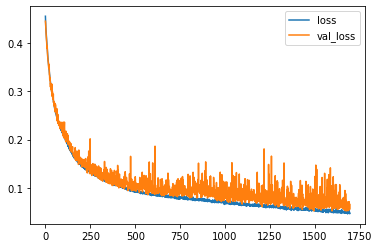


Epoch 01695: val_loss did not improve from 0.05215
dict_keys(['loss', 'accuracy', 'binary_accuracy', 'val_loss', 'val_accuracy', 'val_binary_accuracy'])


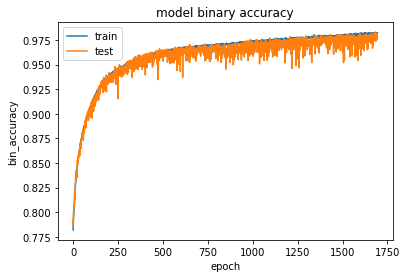

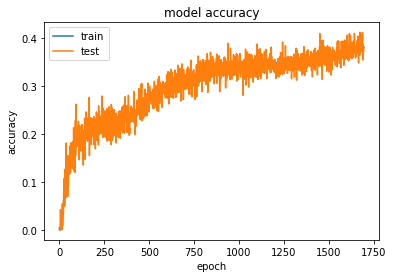

In [19]:
# Building model
# Hyperparameters to consider by order of importance
    # 1. Learing rate alpha
    # iterations
    # 3. Hidden layers L
    # 4. Number of nuerons per hidden layer
    # Regularization
        # L2 Regularization
        # Dropout Regularization (keep probability)
    # Adam Optimization technique for optimizing weights (w, b) 
    # It is combination of Momentum and RMS prop is used to speed up gradient descent
        # 2.alpha (learning rate) and beta1 of momentum.
        # 2. beta2 of RMS prop
        # then apply Bias correction
        # 2. epsilon
    # 5. Learning Rate Decay
    # One of the things that help speed up learning of algorithm us to slowly reduce learning rate over time
    # alpha = (1/(1+ (decay rate * epoch number))) * aplha0
    # 6. Number of mini-batches

# batch_size = grid_result.best_params_['batch_size']
# learning_rate = grid_result.best_params_['learning_rate']

batch_size = 10
learning_rate = 0.001
filepath = 'best_model.hdf5'

# bcm_callback = mltb.keras.BinaryClassifierMetricsCallback(X_test, Y_test)
# es_callback = EarlyStopping(monitor='val_f1', patience=200,  mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=200, mode='min')
check_point = ModelCheckpoint(filepath=filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# callbacks_list = [PlotLearning()]
callbacks_list = [plot_losses, early_stopping, check_point]

model = Sequential()
model.add(Dense(N_h, input_dim=N_i, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(N_h, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(N_o, kernel_initializer='he_uniform', activation='sigmoid'))
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
# model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'binary_accuracy'])


# Fit the model
# history = model.fit(X_train, Y_train, epochs=5000, batch_size = batch_size, verbose=1, validation_data=(X_test, Y_test), shuffle=True, callbacks=callbacks_list)
history = model.fit(X_train, Y_train, epochs=5000, batch_size = batch_size, verbose=1, validation_data=(X_test, Y_test), shuffle=True, callbacks=callbacks_list)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model binary accuracy')
plt.ylabel('bin_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [18]:
saved_model = load_model('best_model.hdf5')

In [19]:
predictions = (saved_model.predict(X_test) > 0.5).astype('int32')

In [20]:
Y_true = Y_test.reset_index(drop=True)

In [21]:
Y_true

,hdl_cholesterol_human_high,hdl_cholesterol_human_low,hdl_cholesterol_human_ok,hemoglobin_human_high,hemoglobin_human_low,hemoglobin_human_ok,cholesterol_ldl_human_high,cholesterol_ldl_human_low,cholesterol_ldl_human_ok
0,0,1,0,0,0,1,0,0,1
1,0,0,1,0,0,1,1,0,0
2,1,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
2623,0,0,1,0,0,1,1,0,0
2624,1,0,0,0,0,1,1,0,0
2625,0,0,1,0,0,1,0,0,1
2626,0,1,0,0,0,1,0,0,1


In [22]:
column_names = ['hdl_cholesterol_human_high_pred', 'hdl_cholesterol_human_low_pred', 'hdl_cholesterol_human_ok_pred', 'hemoglobin_human_high_pred', 'hemoglobin_human_low_pred', 'hemoglobin_human_ok_pred', 'cholesterol_ldl_human_high_pred', 'cholesterol_ldl_human_low_pred', 'cholesterol_ldl_human_ok_pred']
Y_test_pred = pd.DataFrame(data=predictions, columns=column_names)

In [23]:
Y_test_pred

,hdl_cholesterol_human_high_pred,hdl_cholesterol_human_low_pred,hdl_cholesterol_human_ok_pred,hemoglobin_human_high_pred,hemoglobin_human_low_pred,hemoglobin_human_ok_pred,cholesterol_ldl_human_high_pred,cholesterol_ldl_human_low_pred,cholesterol_ldl_human_ok_pred
0,0,1,0,0,0,1,0,0,1
1,0,0,1,0,0,1,1,0,0
2,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
2623,0,0,1,0,0,1,1,0,0
2624,1,0,0,0,0,1,1,0,0
2625,0,0,1,0,0,1,0,0,1
2626,0,1,0,0,0,1,0,0,1


In [24]:
mcm = multilabel_confusion_matrix(Y_true, Y_test_pred)
print(mcm)

[[[2111   14]
  [  68  435]]

 [[1990   28]
  [  39  571]]

 [[1053   60]
  [  51 1464]]

 [[2428    9]
  [  16  175]]

 [[2511    5]
  [   2  110]]

 [[ 277   26]
  [  10 2315]]

 [[1592   10]
  [  47  979]]

 [[2515    6]
  [   3  104]]

 [[1100   33]
  [  31 1464]]]


In [25]:
print(classification_report(Y_true, Y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       503
           1       0.95      0.94      0.94       610
           2       0.96      0.97      0.96      1515
           3       0.95      0.92      0.93       191
           4       0.96      0.98      0.97       112
           5       0.99      1.00      0.99      2325
           6       0.99      0.95      0.97      1026
           7       0.95      0.97      0.96       107
           8       0.98      0.98      0.98      1495

   micro avg       0.98      0.97      0.97      7884
   macro avg       0.97      0.95      0.96      7884
weighted avg       0.98      0.97      0.97      7884
 samples avg       0.98      0.97      0.97      7884



In [26]:
# Normalization of X

# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
#Normalization is good to use when you know that the distribution of your data does not follow a 
#Gaussian distribution. 
#This can be useful in algorithms that do not assume any distribution of the data like 
#K-Nearest Neighbors and Neural Networks.
#Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 
#However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a 
#bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

#https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
#If the distribution of the quantity is normal, then it should be standardized, otherwise the data should 
#be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm_2 = MinMaxScaler().fit(unk_data)

# transform training data
unk_data_norm = norm_2.transform(unk_data)

# transform validation data
# X_val_norm = norm.transform(X_val)

# transform test data
# X_test_norm = norm.transform(X_test)

In [27]:
unknown_predictions = (saved_model.predict(unk_data_norm) > 0.5).astype('int32')
column_names = ['hdl_cholesterol_human_high_pred', 'hdl_cholesterol_human_low_pred', 'hdl_cholesterol_human_ok_pred', 'hemoglobin_human_high_pred', 'hemoglobin_human_low_pred', 'hemoglobin_human_ok_pred', 'cholesterol_ldl_human_high_pred', 'cholesterol_ldl_human_low_pred', 'cholesterol_ldl_human_ok_pred']
unknown_pred_classes = pd.DataFrame(data=unknown_predictions, columns=column_names)

In [28]:
unknown_pred_classes

,hdl_cholesterol_human_high_pred,hdl_cholesterol_human_low_pred,hdl_cholesterol_human_ok_pred,hemoglobin_human_high_pred,hemoglobin_human_low_pred,hemoglobin_human_ok_pred,cholesterol_ldl_human_high_pred,cholesterol_ldl_human_low_pred,cholesterol_ldl_human_ok_pred
0,0,0,1,1,0,0,0,0,1
1,1,1,0,0,0,1,1,0,0
2,0,1,0,0,0,1,1,0,0
3,0,0,1,0,0,1,1,0,0
4,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
3655,0,0,1,0,0,1,0,0,1
3656,0,1,0,0,0,1,0,0,1
3657,1,0,1,0,0,1,0,1,0
3658,0,1,0,0,0,1,1,0,0


In [29]:
total_df = pd.concat([ID_df, unknown_pred_classes], axis=1)

In [30]:
total_df

,Reading_ID,hdl_cholesterol_human_high_pred,hdl_cholesterol_human_low_pred,hdl_cholesterol_human_ok_pred,hemoglobin_human_high_pred,hemoglobin_human_low_pred,hemoglobin_human_ok_pred,cholesterol_ldl_human_high_pred,cholesterol_ldl_human_low_pred,cholesterol_ldl_human_ok_pred
0,ID_37BEI22R,0,0,1,1,0,0,0,0,1
1,ID_4W85V5DV,1,1,0,0,0,1,1,0,0
2,ID_L4YR3NDY,0,1,0,0,0,1,1,0,0
3,ID_U88E3SQ6,0,0,1,0,0,1,1,0,0
4,ID_NW7Z3XU7,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3655,ID_ADCBL266,0,0,1,0,0,1,0,0,1
3656,ID_SW51B61O,0,1,0,0,0,1,0,0,1
3657,ID_CO8IHJRA,1,0,1,0,0,1,0,1,0
3658,ID_VN5CP3ZZ,0,1,0,0,0,1,1,0,0


In [31]:
id_list = []
for ind in total_df.index:
    id_list.append(total_df['Reading_ID'][ind]+'_hdl_cholesterol_human')
    id_list.append(total_df['Reading_ID'][ind]+'_hemoglobin(hgb)_human')
    id_list.append(total_df['Reading_ID'][ind]+'_cholesterol_ldl_human')
